# Pandas Essential Basic Functionality

https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html

Pandas is well suited for many different kinds of data, but most of the time we use it for **tabular data with heterogeneously-typed columns**, as in an SQL table or Excel spreadsheet

Here are just a few of the things that Pandas does well:

- Easy handling of missing data (represented as NaN)
- Automatic and explicit data alignment
- Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
- Intuitive merging and joining data sets
- Flexible reshaping and pivoting of data sets
- Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
- Time series-specific functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging, etc

We'll start by importing the Pandas module.
The second line is a 
["magic" function](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) 
to tell the Pandas plotting functions to display inline with the notebook.

In [10]:
import pandas as pd
%matplotlib inline

## Data Structures

- **Series**	1D labeled homogeneously-typed array
    - Container for scalars or strings
    - Each one has an index and potentially a name
- **DataFrame**	General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed column
    - Container for Series
    - Overall index, and each Series (column) has a name

**We would like to be able to insert and remove objects from these containers in a dictionary-like fashion.**

**NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column.**

## Load DataFrame from a CSV file

There are many ways to create a DataFrame from scratch, but I would guess more often you'll just load them from a file (CSV, Excel, etc), database, or HTML page.

- `.read_csv()` can read from any character-delimited text file. 
- A comma separator is the default, but we'll specify it here expicitly, just so you can see the option. 
- If you know it, it's important to set the character encoding explicitly, too, to make sure non-ascii characters are read and interpreted properly.

In [2]:
df = pd.read_csv('data/women_percent_deg_usa_subset.csv', sep=',', encoding='utf-8')

### `.head()` and `.tail()`

If we just type `df` and execute that, it will show us the whole DataFrame, but often it's most handy to just see a piece of the beginning or end of the data set. We can set the number of rows to be returned inside the parentheses – default is 5 rows.

In [3]:
df.head()

,Year,Agriculture,Business,Engineering,Health,Psychology
0,1970,4.229798,9.064439,0.8,77.1,44.4
1,1971,5.452797,9.503187,1.0,75.5,46.2
2,1972,7.420710,10.558962,1.2,76.9,47.6
3,1973,9.653602,12.804602,1.6,77.4,50.4
4,1974,14.074623,16.204850,2.2,77.9,52.6


In [4]:
df.tail(3)

,Year,Agriculture,Business,Engineering,Health,Psychology
39,2009,48.667224,48.840474,16.8,85.1,77.1
40,2010,48.730042,48.757988,17.2,85.0,77.0
41,2011,50.037182,48.180418,17.5,84.8,76.7


### DataFrame Index

Notice the numbers off to the left of the data. That is the `index` of the DataFrame. It's like the row numbers in Excel, but more powerful. This can be used to access rows, and is used by Pandas to align rows when you combine data from different sources.

If you don't create the index explicitly, or tell `read_csv()` to use a specific data column as the index, Pandas will use a range of integers by default.

In [6]:
df.index

RangeIndex(start=0, stop=42, step=1)


### DataFrame columns

Across the top we see that Pandas has by default used the first row of data as column names. These will be used to access columns, and it's a much less error-prone way to keep track of columns than Excel's A,B,C column markers.

In [7]:
df.columns

Index(['Year', 'Agriculture', 'Business', 'Engineering', 'Health',
       'Psychology'],
      dtype='object')

### Plot to just view what we have

We'll go into more visualization later, but for now it's a quick way to see what the overall data looks like, and some plotting functions are built right into Pandas.

*Note that the Pandas built-in plotting likes this type of "wide" data, where the columns are each a data series we want as a separate line, and numerical data values are spread out across multiple columns. We'll see examples later of other plotting modules that want "tidy" data, where each type of data is in a single column.*

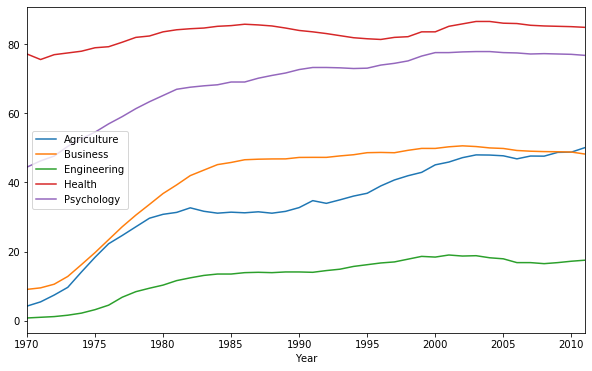

In [13]:
df.plot(x='Year', y=['Agriculture','Business','Engineering','Health','Psychology'], figsize=[10,6])